# Clique Decompositions of Graphs

## By Moses A. Boudourides

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import numpy as np
import scipy as sp
from itertools import combinations 
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from pylab import hist
from IPython.display import Image
from IPython.core.display import HTML 
from netwulf import visualize
from networkx.algorithms import bipartite
import string
import itertools as it
from operator import itemgetter
import warnings
warnings.filterwarnings('ignore')

In [2]:
G=nx.read_gml("Miserables.gml")
name="Les Miserables graph"

# G=nx.karate_club_graph()
# name="The Karate Club graph"

# G=nx.florentine_families_graph()
# name="The Florentine Families graph"

# nn=50
# pp=0.1
# while True:
#     G=nx.erdos_renyi_graph(nn,pp)
#     if nx.is_connected(G)==True:
#         break
# name="Erdos Renyi graph (with %i nodes and %.2f probability)" %(nn,pp)

In [3]:
cliques=[clique for clique in nx.find_cliques(G)]
gcliques=[clique for clique in cliques if len(clique)>2]
lcliques=[clique for clique in cliques if len(clique)<=2]
print "The total number of cliques is %i" %len(cliques)
print "The total number of non trivial cliques is %i" %len(gcliques)
print "The total number of trivial cliques is %i" %len(lcliques)

The total number of cliques is 59
The total number of non trivial cliques is 37
The total number of trivial cliques is 22


In [4]:
n2cdi={}
for n in G.nodes():
    for w in gcliques:
        if n in w:
            n2cdi[n]=w
# for k,v in n2cdi.items():
#     print k,v

In [5]:
cdi={}
for i,j in list(enumerate(cliques)):
    if i+1<10:
        cdi["clique_0"+str(i+1)]=j
    else:
        cdi["clique_"+str(i+1)]=j
# for k,v in cdi.items():
#     print k,v
# print 

gcdi={k:v for k,v in cdi.items() if len(v)>2}
# print len(gcdi)
# for k,v in gcdi.items():
#     print k,v

In [6]:
eds=[]
for k,v in cdi.items(): #g
    for vv in v:
        eds.append((k,vv))
H=nx.Graph()
H.add_edges_from(eds)
print len(H.nodes()),len(H.edges())
print nx.is_bipartite(H)
# X, Y = bipartite.sets(H)
# Y=sorted(Y)
# print len(X),len(Y)
# sorted(list(Y))==sorted([n for n in list(H.nodes()) if type(n)==str])
Y=sorted([n for n in list(H.nodes()) if type(n)==str and "clique_" in n])
X=sorted([n for n in H.nodes() if n not in Y])
print len(X),len(Y)

136 226
True
77 59


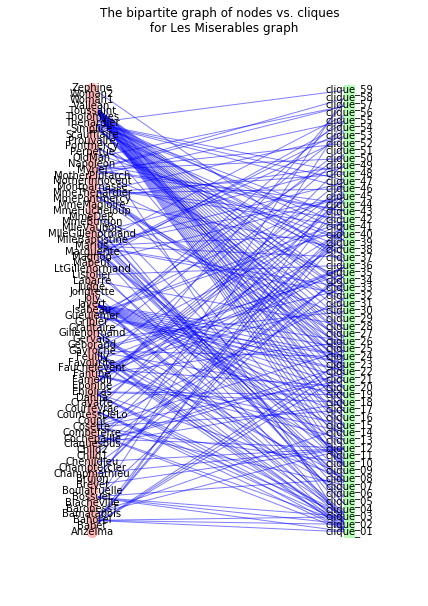

In [7]:
pu=1.

posbp={}
if len(X)==max([len(X),len(Y)]):
    for i,x in list(enumerate(X)):
        posbp[x]=(0,i)
    for j,y in list(enumerate(Y)):
#         posbp[y]=(1,j+j*float(i)/len(Y))
        posbp[y]=(1,(j+j*float(i))/len(Y))
else:
    for i,x in list(enumerate(Y)):
        posbp[x]=(1,i)
    for j,y in list(enumerate(X)):
#         posbp[y]=(0,j+j*float(i)/len(Y))
        posbp[y]=(0,(j+j*float(i))/len(Y))

plt.figure(figsize=(7,10));
nodes1 = nx.draw_networkx_nodes(H, pos=posbp,node_size=100,nodelist=Y,node_color="#b3ffb3",node_shape='s')
nodes2 = nx.draw_networkx_nodes(H, pos=posbp,node_size=100,nodelist=X,node_color="#ffb3b3",node_shape='o')
# nodes1.set_edgecolor('k')
# nodes2.set_edgecolor('k')
nx.draw_networkx_edges(H, pos=posbp, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(H, pos=posbp,font_size=10)
plt.axis('off');
# yoffset = {}
# y_off = -8  # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(n_eG, yoffset);
plt.margins(x=0.25, y=0.1)
sst="The bipartite graph of nodes vs. cliques \n for %s" %name
plt.title(sst);

In [8]:
cleds=[]
# sbeds=[]
for k,v in gcdi.items(): 
    ve=G.subgraph(v).edges()
    for w in ve:
        cleds.append(w)
cleds+=[(c2,c1) for (c1,c2) in cleds]
# for e in G.edges():
#     if e not in cleds:
#         sbeds.append(e)
sbeds=[e for e in G.edges() if e not in cleds]
# print len(sbeds)
# sorted(sbeds)

In [9]:
ceds=[]
for c in list(combinations(Y, 2)):
    ints=set(cdi[c[0]]).intersection(cdi[c[1]])
    if len(ints)>0:
        ceds.append((c[0],c[1],len(ints),list(ints)))
# print len(ceds)
# for e in ceds:
#     print e

In [10]:
weight={(i,j):(k,l) for (i,j,k,l) in ceds}
# for (i,j,k,l) in ceds:
#     weight[(i,j)]=k
# intersection={(i,j):l for (i,j,k,l) in ceds}    
    
w_edges=[(x,y,z) for (x,y),z in weight.items()]

cG = nx.Graph()
cG.add_weighted_edges_from(w_edges)

elabels={}
elabels = nx.get_edge_attributes(cG,'weight')
edge_width=[cG[u][v]['weight'][0] for u,v in cG.edges()] 
edge_width=[w for w in edge_width]

lcdi={k:len(v) for k,v in cdi.items()}
nx.set_node_attributes(cG, lcdi, name="clique_size")

In [11]:
nodes_between_2cliques={}
tt=[]
for (x,y,z) in cG.edges(data=True):
    for xx in cdi[x]:
        if xx not in n2cdi.keys():
            for yy in cdi[y]:
                if yy not in n2cdi.keys():
                    tt.append((xx,yy,z))
for (x,y,z) in tt:
    if z['weight'][0]==1:
        if z['weight'][1][0] not in n2cdi.keys():
#         if lcdi[x]==2 and lcdi[y]==2:
            nodes_between_2cliques[(x,y)]=z['weight'][1][0]
# print len(set(nodes_between_2cliques.values())),list(set(nodes_between_2cliques.values()))

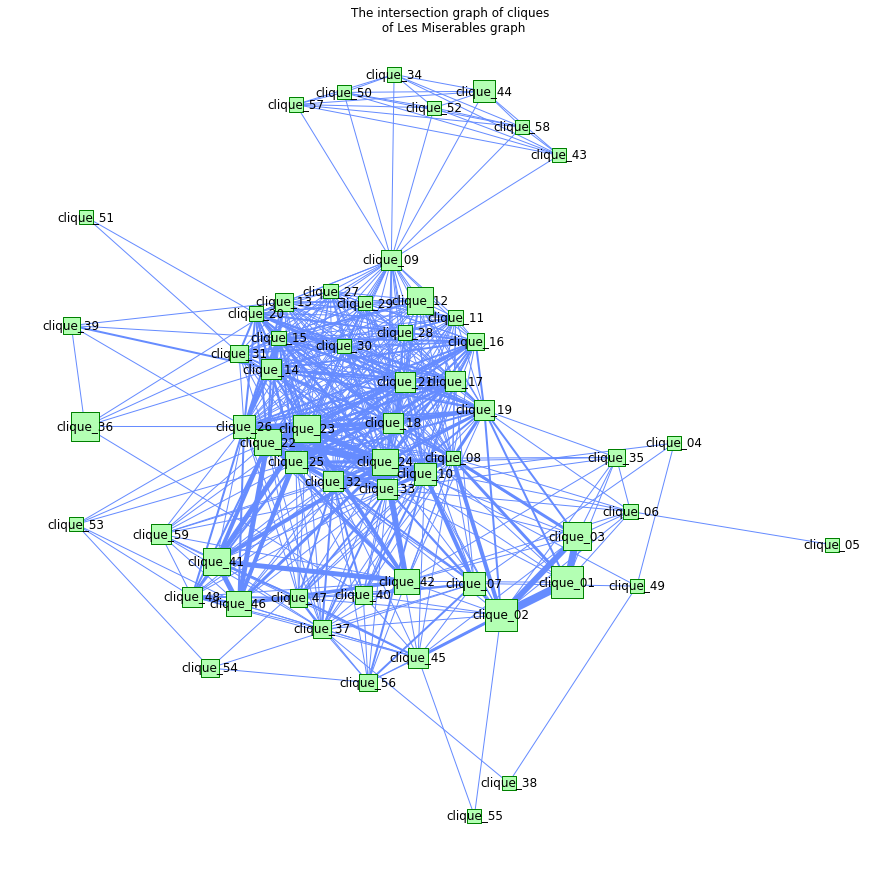

In [12]:
figsize=(15,15)
pos=graphviz_layout(cG); #pos=nx.circular_layout(G); 
node_color="#b3ffb3" #"#ffb3b3"
node_border_color="g"
edge_color="#668cff"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(cG, pos, node_size=[100*v for v in lcdi.values()],node_color=node_color,node_shape="s")
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(cG, pos, edge_color=edge_color,width=edge_width)
nx.draw_networkx_labels(cG, pos)
# nx.draw_networkx_edge_labels(cG,pos,edge_labels=elabels);
plt.axis('off');
sst="The intersection graph of cliques \n of %s" %name
plt.title(sst);

In [13]:
intersecting_clique_edges=[]
for e in cG.edges(data=True):
    a=cdi[e[0]]
    b=cdi[e[1]]
    c=set(a).intersection(set(b))
    if len(c)>1:
        sG=G.subgraph(list(c))
        for se in sG.edges():
            if se not in intersecting_clique_edges:
                intersecting_clique_edges.append(se)
# print len(intersecting_clique_edges),len(G.edges())
# intersecting_clique_edges

In [14]:
leaves=[n for n in G.nodes() if G.degree(n)==1]
# print len(leaves)
# leaves

In [15]:
pendants=[e for e in G.edges() if e[0] in leaves or e[1] in leaves]
# print len(pendants)
# pendants

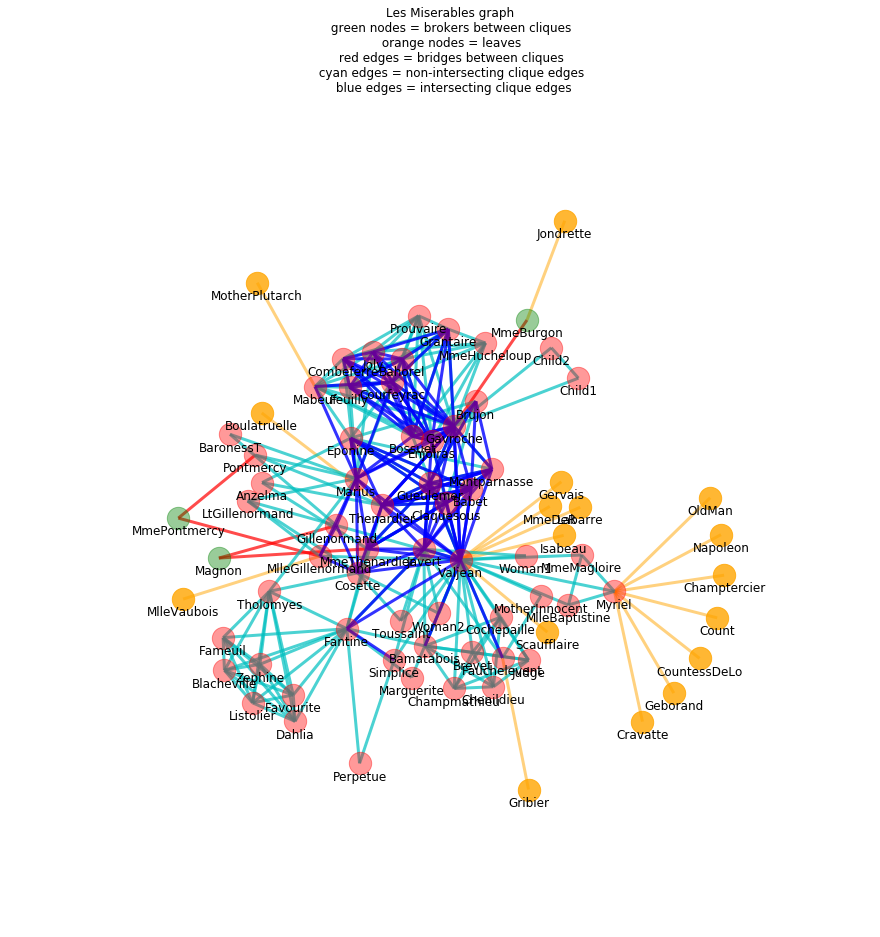

In [16]:
nb2c=list(set(nodes_between_2cliques.values()))

pos=graphviz_layout(G);
plt.figure(figsize=(15,15));
# n1=['Ginori', 'Acciaiuoli', 'Salviati', 'Guadagni', 'Barbadori']
# n2=[n for n in G.nodes() if n not in n1]
# nodes = nx.draw_networkx_nodes(G, pos, node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes() if n not in nb2c and n not in leaves],node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb2c,node_size=500,node_color="g", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=leaves,node_size=500,node_color="orange", alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=[e for e in sbeds if e not in pendants],width=3,edge_color="r", alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=pendants,width=3,edge_color="orange", alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=[e for e in G.edges() if e not in sbeds and e not in pendants and e not in intersecting_clique_edges],width=3,edge_color="c", alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=intersecting_clique_edges,width=3,edge_color="b", alpha=0.8)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
yoffset = {}
y_off = -10  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
plt.margins(x=0.25, y=0.2)
sst="%s \n green nodes = brokers between cliques \n orange nodes = leaves \n red edges = bridges between cliques \n cyan edges = non-intersecting clique edges \n blue edges = intersecting clique edges" %name
plt.title(sst);

In [17]:
print "The %s graph has:" %name
print "%i nodes and %i edges" %(len(G.nodes()),len(G.edges()))
print "%i (maximal) cliques" %len(cliques)
print "%i cliques with size > 2" %len(gcliques) 
print "%i 2-cliques (i.e., edges outside larger cliques)" %len(lcliques)
print "%i nodes are brokers between cliques" %len(set(nodes_between_2cliques.values()))
print "%i nodes are leaves" %len(leaves)
print "%i edges are bridges between cliques" %len([e for e in sbeds if e not in pendants])
print "%i edges are intersecting edges in cliques" %len(intersecting_clique_edges)
print "%i edges are non-intersecting edges in cliques" %len([e for e in G.edges() if e not in sbeds and e not in pendants and e not in intersecting_clique_edges])

The Les Miserables graph graph has:
77 nodes and 254 edges
59 (maximal) cliques
37 cliques with size > 2
22 2-cliques (i.e., edges outside larger cliques)
3 nodes are brokers between cliques
17 nodes are leaves
5 edges are bridges between cliques
109 edges are intersecting edges in cliques
166 edges are non-intersecting edges in cliques


## Assortativity Coefficient of the Clique Decomposition of the Graph

In [18]:
def rattr(G,P): #k):   
    Gd=nx.Graph(G)
#     P=rdecomp(Gd,k)
    membership={}
    for n in Gd.nodes():
        t=[]
        for i,p in list(enumerate(P)):
            if n in p:
                t.append("attr_"+str(i))
        membership[n]=t
    nx.set_node_attributes(Gd, membership, 'attribute')
    return Gd #P,Gd

In [19]:
Gd=rattr(G,cliques)

Gdm=nx.Graph(Gd)
rm=[]
ad={}
for i in Gdm.nodes(data=True):
    t=[]
    ia=i[1]['attribute']
    lia=len(ia)
    for j in range(lia):
#         print i[0],j,ia[j]
        if type(i[0])==unicode:
            ie=i[0].encode('utf8')
        else:
            ie=i[0]
#         print type(ie),type(i[0])
        rm.append(i[0])
        for node in Gd.nodes():
            if type(node)==unicode: #str:
                x=str(len(Gd))+str(ie)+str(j)
                Gdm.add_node(x, attribute=ia[j])
    #             Gdm.add_node(str(len(Gd))+u+str(i[0])+str(j), attribute=ia[j])
                if x not in t:
                    t.append(x) #str(len(Gd))+str(i[0])+str(j))
            elif type(node)==str:
                x=str(len(Gd))+str(ie)+str(j)
                Gdm.add_node(x, attribute=ia[j])
    #             Gdm.add_node(str(len(Gd))+u+str(i[0])+str(j), attribute=ia[j])
                if x not in t:
                    t.append(x) #str(len(Gd))+str(i[0])+str(j))
            else:
                x=str(len(Gd))+str(ie)+str(j)
                Gdm.add_node(int(str(len(Gd))+str(i[0])+str(j)), attribute=ia[j])
                if x not in t:
                    t.append(int(str(len(Gd))+str(i[0])+str(j)))
    ad[i[0]]=t
s=0
for k,v in ad.items():
    s+=len(v)
Gdm.remove_nodes_from(rm)
eds=[]
se=0
for (i,j) in Gd.edges():
    for p in ad[i]:
        for q in ad[j]:
            eds.append((p,q))
            se+=1
# print eds
Gdm.add_edges_from(eds)
print "Gdm nodes",s
print "Gdm edges",se
# print "Gd",len(Gd.nodes()),len(Gd.edges())
print "Gdm",len(Gdm.nodes()),len(Gdm.edges())

Gdm nodes 226
Gdm edges 8248
Gdm 226 8248


In [20]:
ac=nx.attribute_assortativity_coefficient(Gdm,'attribute')
print "The assortativity coefficient of the clique decomposition of %s is %.4f" %(name,ac)

The assortativity coefficient of the clique decomposition of Les Miserables graph is 0.0291
